In [2]:
#planning on understanding and extractinng different features from audio files 
#librosa will be the most important library here
#!pip install librosa

In [3]:
import librosa
import librosa.display
import IPython.display as ipd #will help in loading files to note book
import numpy as np
import matplotlib.pyplot as plt

In [4]:
ipd.Audio("C:\\Users\\adhik\\Downloads\\Code and Files\\file_example_WAV_2MG.wav") #used to load 

In [5]:
music , sr = librosa.load("C:\\Users\\adhik\\Downloads\\Code and Files\\file_example_WAV_2MG.wav")  # music will  be saving the features of the audio , sr willbe used to sr=sample rate

In [6]:
print("print me the shape of the Audio file",music.shape)
print("sample rate of the Audio file:",sr)

print me the shape of the Audio file (739329,)
sample rate of the Audio file: 22050


In [8]:
sample_duration = 1/sr
print(f"Duration of one sample is {sample_duration:6f} seconds")

Duration of one sample is 0.000045 seconds


In [10]:
pip install librosa matplotlib


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


Text(0.5, 1.0, 'Sample music')

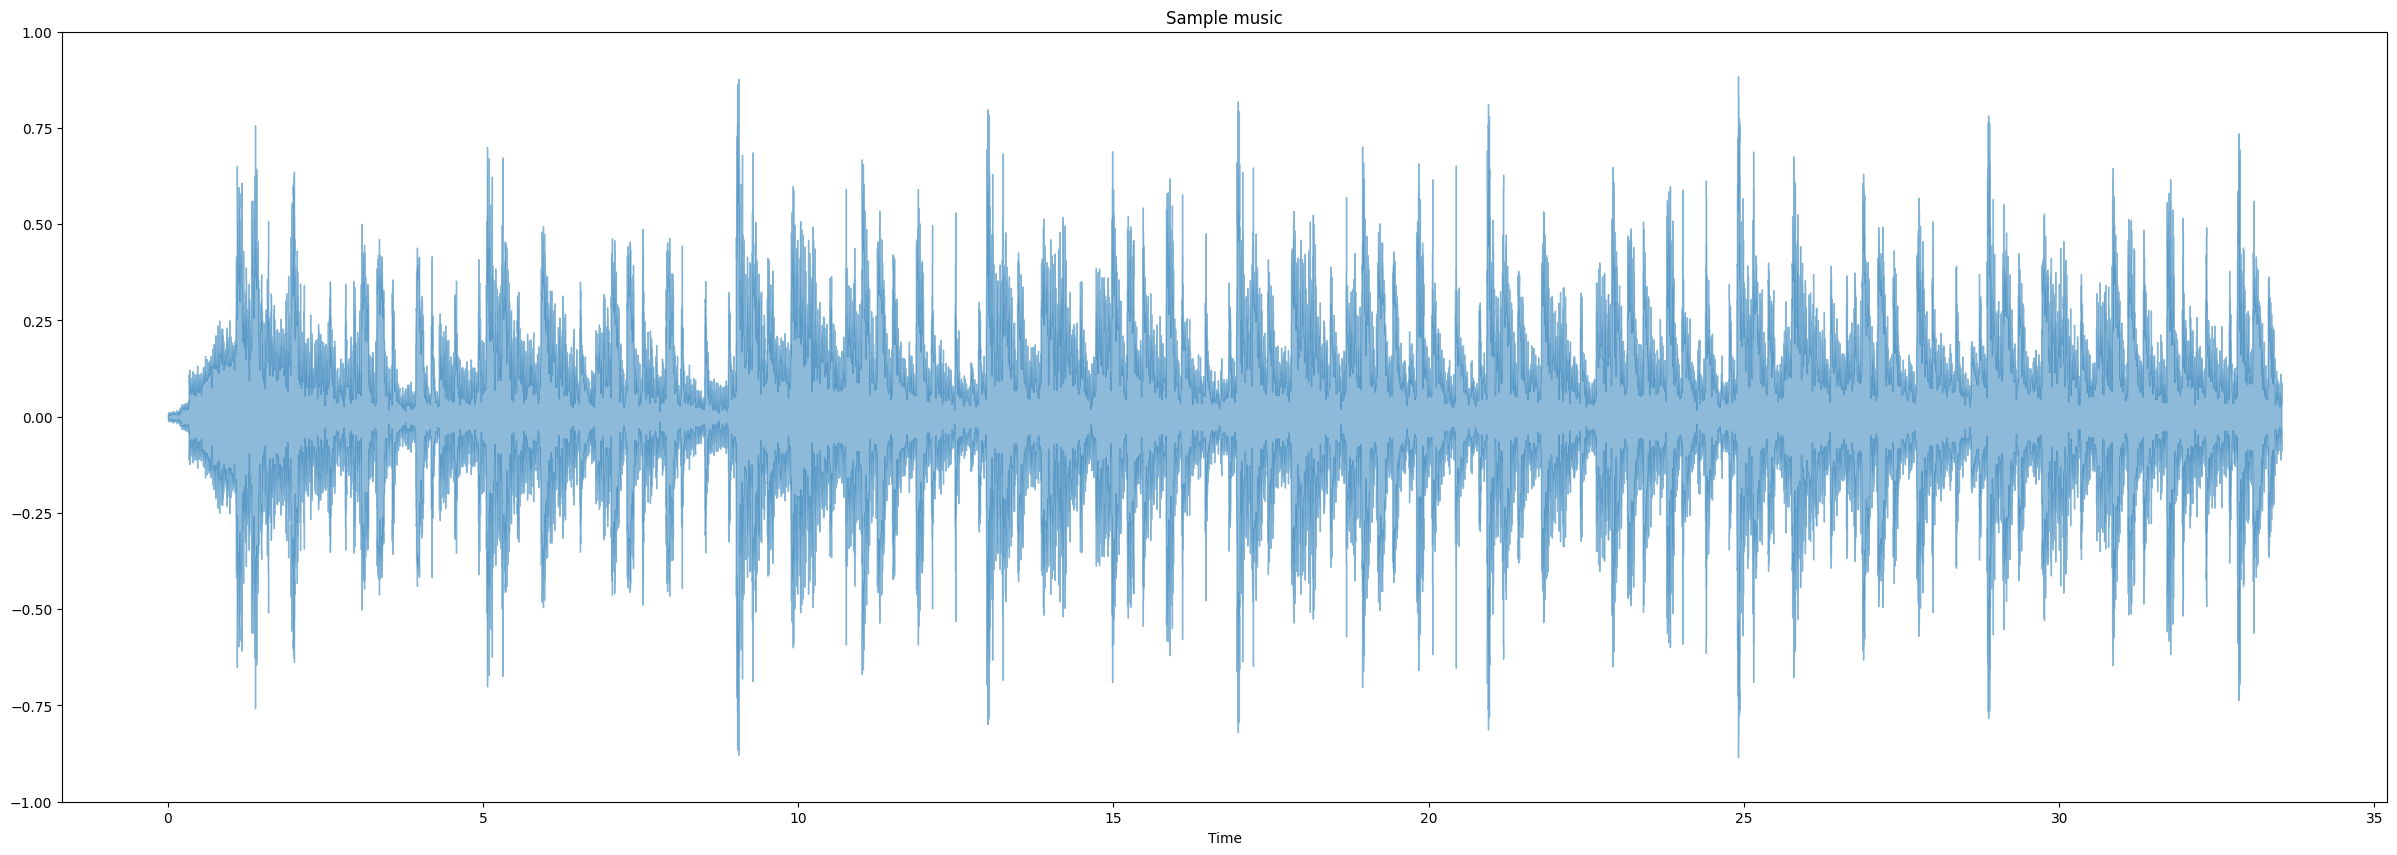

In [13]:
#visualising the audio file
plt.figure(figsize=(30,10))
librosa.display.waveshow(music,sr=sr,alpha=0.5) #waveplot is deprecated its waveshow now hehe 
plt.ylim((-1,1))
plt.title("Sample music")

In [15]:
#extracting time domain audio features
#Amplitude envelope measurement
FRAME_SIZE = 1024
HOP_LENGTH = 512 # used for overlapping frames
def amplitude_envelope(signal,frame_size,hop_length):
    amplitude_envelope = []

    #calculating amplitude envelope for each frame
    for i in range(0,len(signal),hop_length):
        amplitude_envelope_current_frame = max(signal[i:i+frame_size])
        amplitude_envelope.append(amplitude_envelope_current_frame)

    return np.array(amplitude_envelope)


In [16]:
AE_music = amplitude_envelope(music,FRAME_SIZE,HOP_LENGTH)

In [19]:
print(len(AE_music)) #number of frames being produces

1445


In [20]:
AE_music

array([0.01155477, 0.01219486, 0.01496671, ..., 0.09956191, 0.09956191,
       0.        ], dtype=float32)

In [24]:
AE_music.shape

(1445,)

Text(0.5, 1.0, 'sample Music')

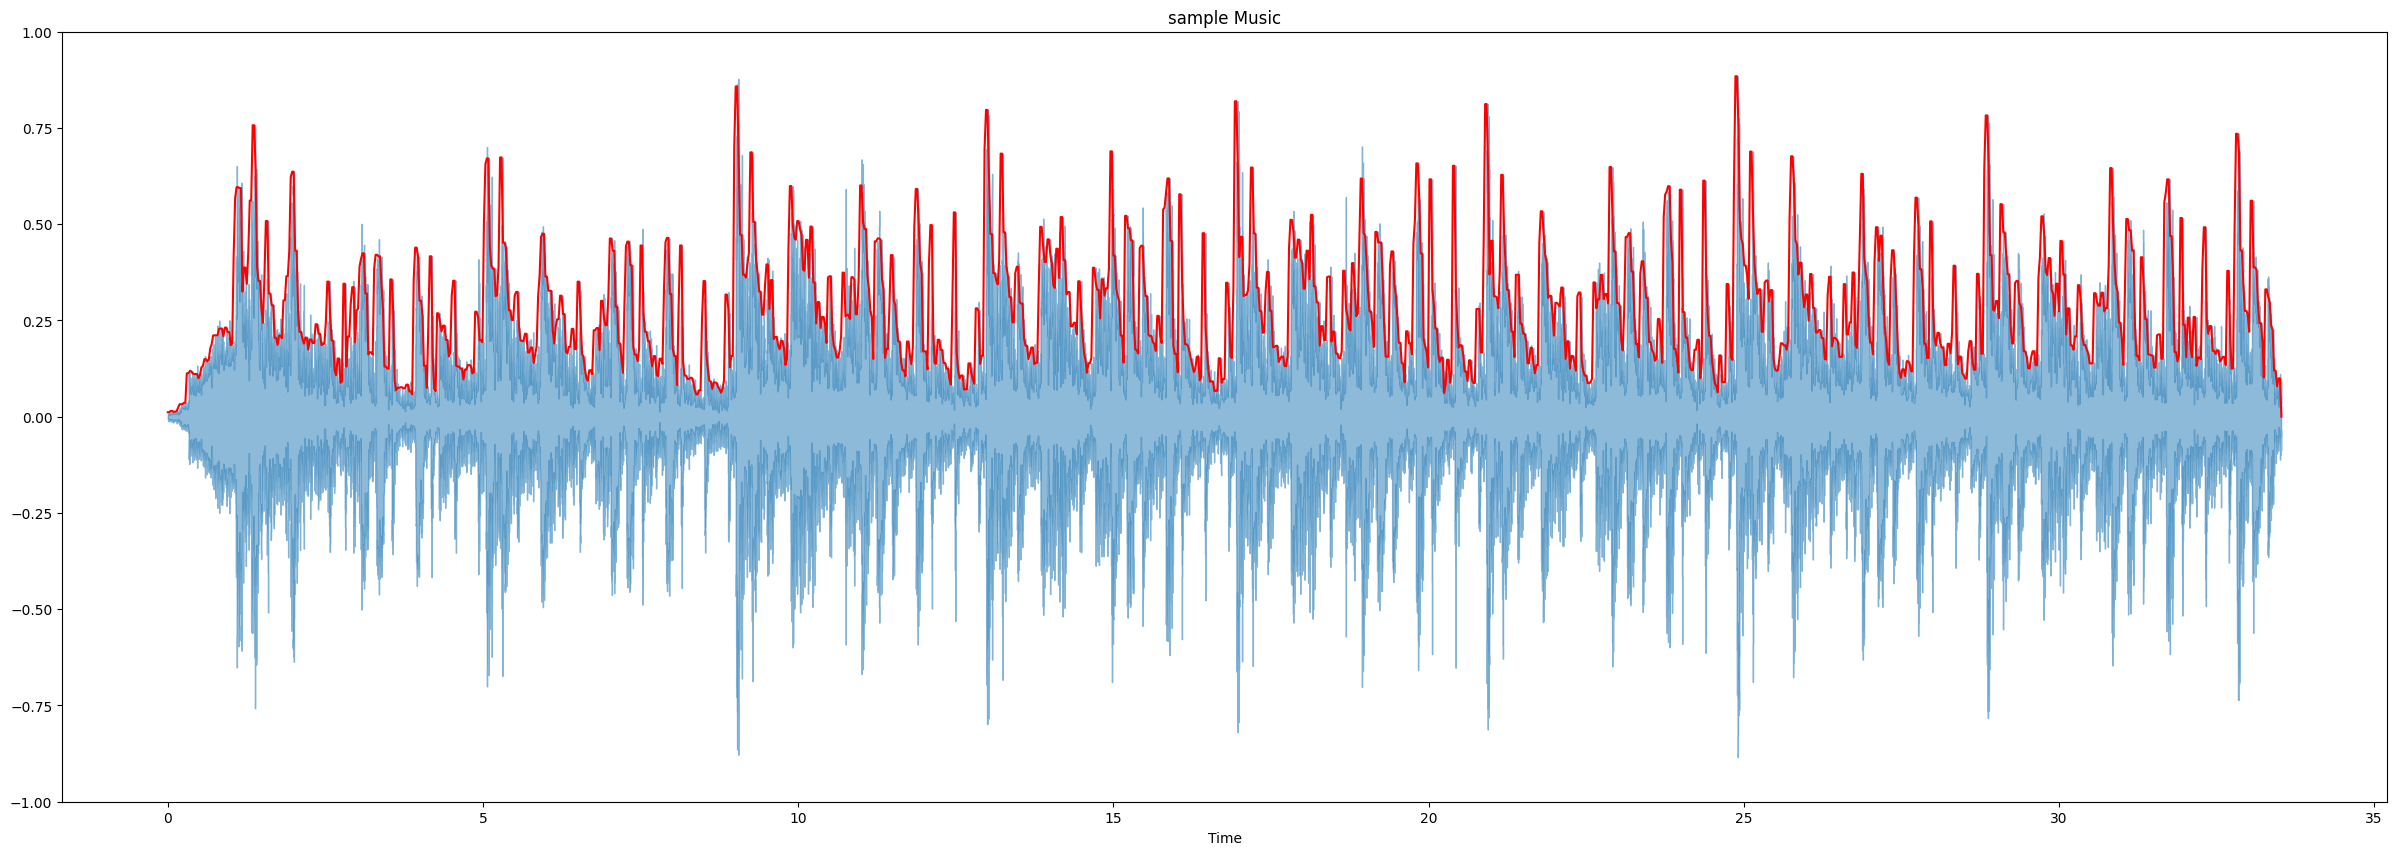

In [26]:
frames = range(len(AE_music))
t=librosa.frames_to_time(frames,hop_length=HOP_LENGTH)

plt.figure(figsize=(30,10))

librosa.display.waveshow(music,alpha=0.5)
plt.plot(t,AE_music,color="r")
plt.ylim(-1,1)
plt.title("sample Music")
#the loudness will be usefull  for classification of Genere

In [27]:
##Zero crossing rate =  the rate at which signal is crossing the negetive values to zero and then to possitive value

In [28]:
ZCR_music = librosa.feature.zero_crossing_rate(music,frame_length=FRAME_SIZE,hop_length=HOP_LENGTH)[0]

In [30]:
ZCR_music.shape

(1445,)

In [31]:
frame = range(len(ZCR_music))
t = librosa.frames_to_time(frames,hop_length=HOP_LENGTH)

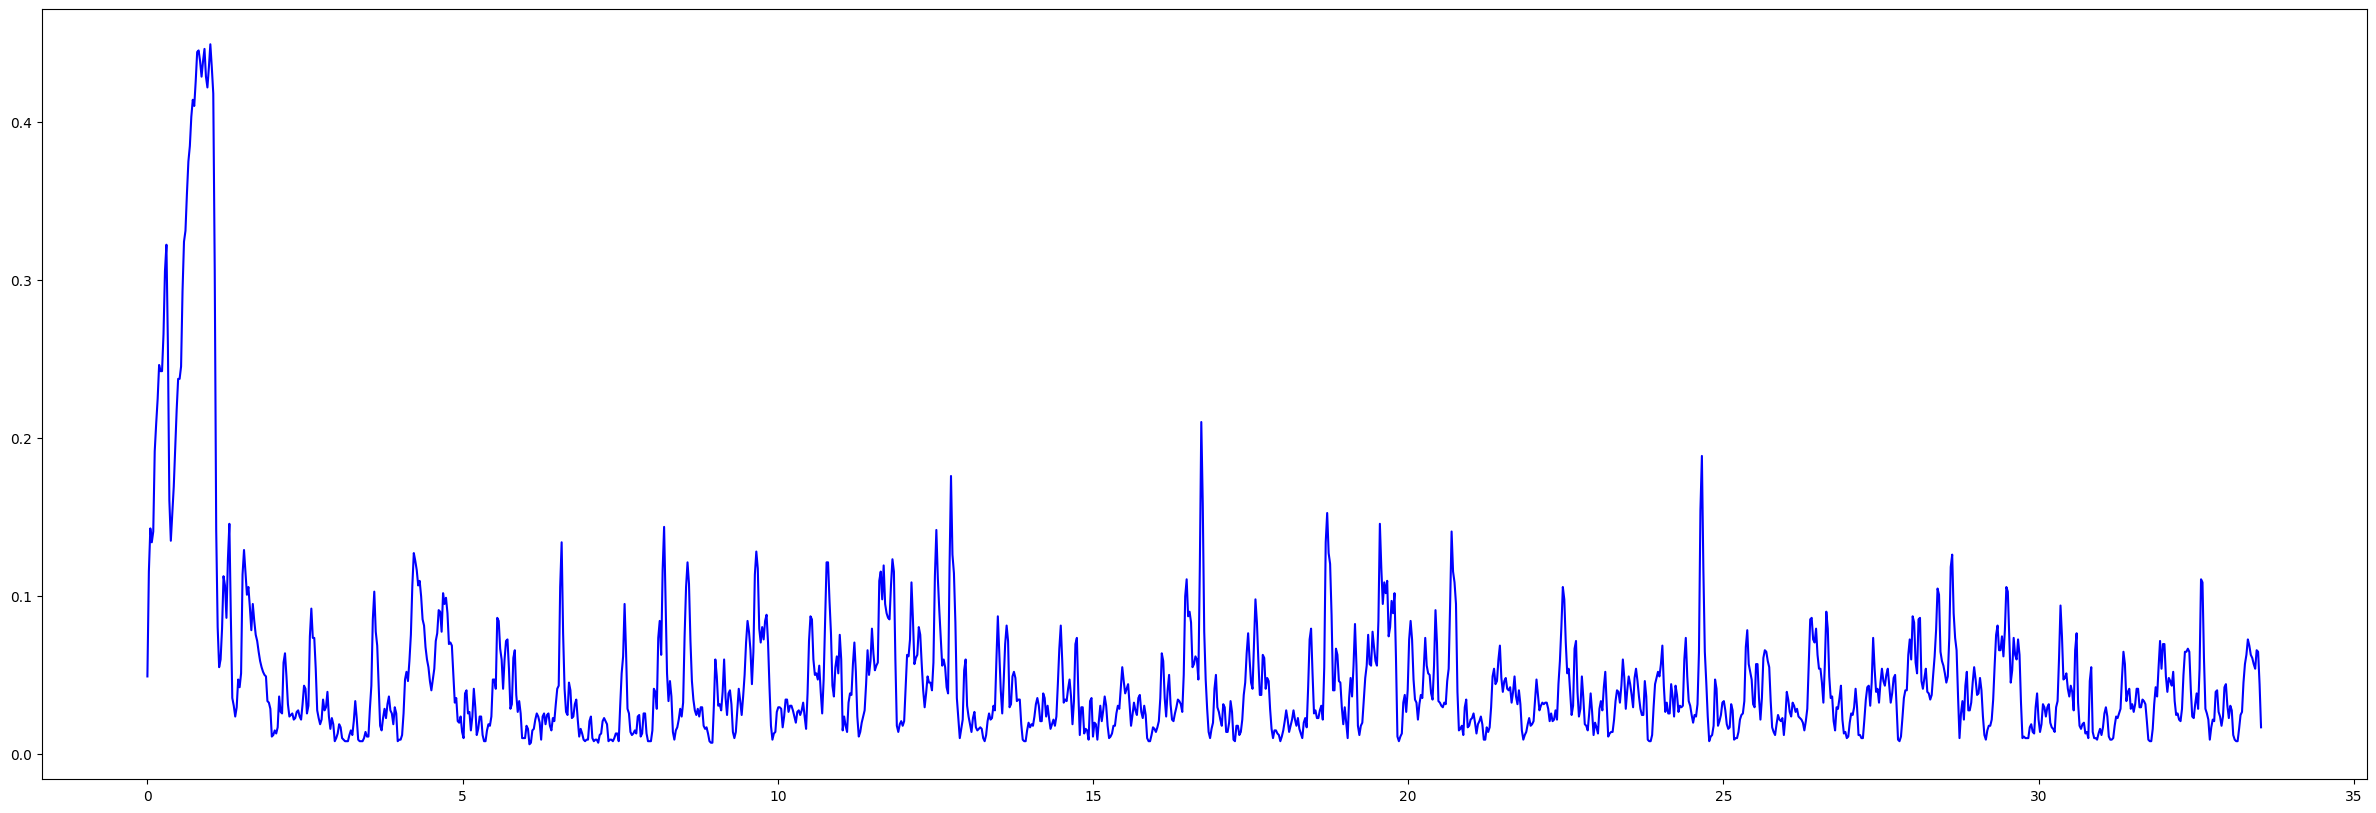

In [32]:
plt.figure(figsize=(30,10))
plt.plot(t,ZCR_music,color='b')

In [33]:
##root mean square energy == basicaly means square of all samples present in a frame

In [37]:
RMS_music = librosa.feature.rms(y=music, frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)[0]

In [38]:
##visualising the RMS_music 


Text(0.5, 1.0, 'Sample')

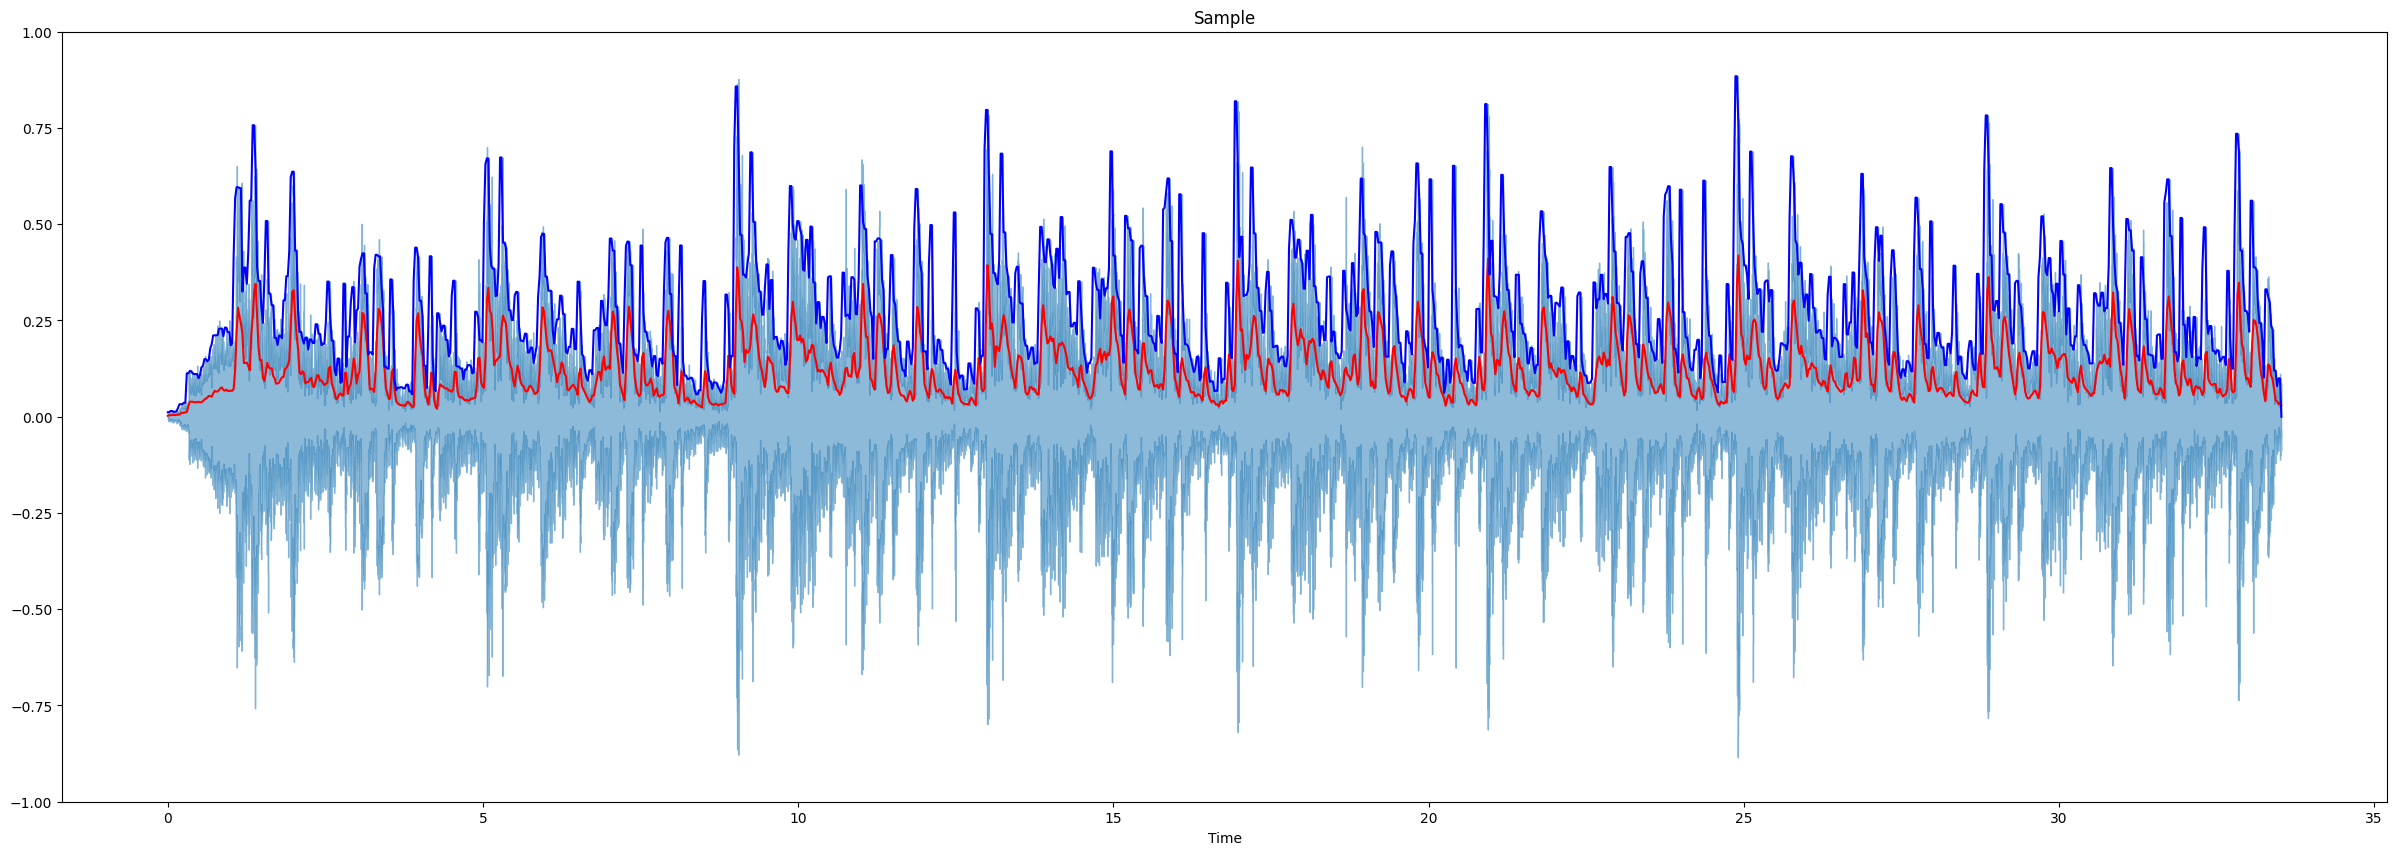

In [46]:
frames = range(len(RMS_music))
t = librosa.frames_to_time(frames,hop_length = HOP_LENGTH)
plt.figure(figsize=(30,10))
librosa.display.waveshow(music,alpha=0.5)
plt.plot(t,RMS_music,color="r")
plt.plot(t,AE_music,color="b")
plt.ylim(-1,1)
plt.title("Sample")

In [48]:
##fourier transformations convert audio from time domain to frequnecy domain

In [49]:
fft_music = np.fft.fft(music)
len(fft_music)

739329

In [58]:
def plot_magnitude_spectrum(signal,sr,title,f_ratio=1):
    fft_music = np.fft.fft(signal)
    fft_abs = np.absolute(fft_music)

    plt.figure(figsize=(18,5))

    f=np.linspace(0,sr,len(fft_abs))
    f_bins = int(len(fft_abs)*f_ratio)

    plt.plot(f[:f_bins],fft_abs[:f_bins])
    plt.title('Frequency(HZ)')
    plt.title(title)

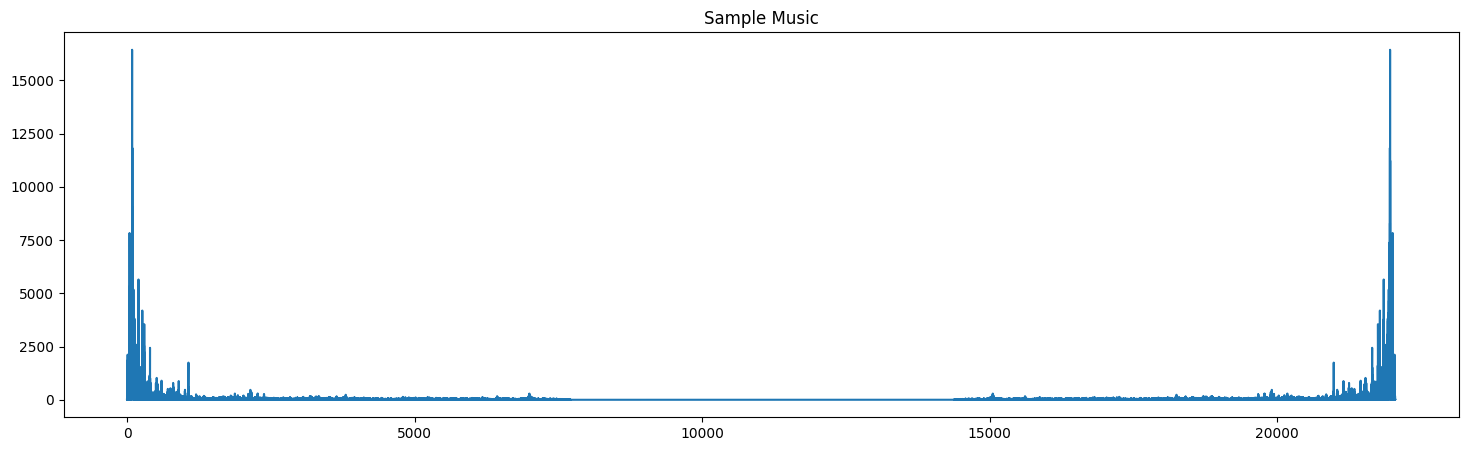

In [59]:
plot_magnitude_spectrum(music,sr,"Sample Music", 1)

In [61]:
##plotting spectogram spectogram uses the short time fourier transform
#extracting short time fourier transform
FRAME_SIZE = 2048
HOP_SIZE = 512
ssft = librosa.stft(music,n_fft = FRAME_SIZE,hop_length = HOP_SIZE)

In [62]:
type(ssft[0][0])

numpy.complex64

In [65]:
##we want  absolute values not complex
#convert 
ssft_abs = np.abs(ssft)**2
type(ssft_abs[0][0])

numpy.float32

In [66]:
#visualization
def plot_spectogram(Y,sr,hop_length,y_axis="linear"):
    plt.figure(figsize=(25,10))
    librosa.display.specshow(Y,sr=sr,hop_length=hop_length,x_axis="time",y_axis=y_axis)
    plt.colorbar(format="%+2.f")

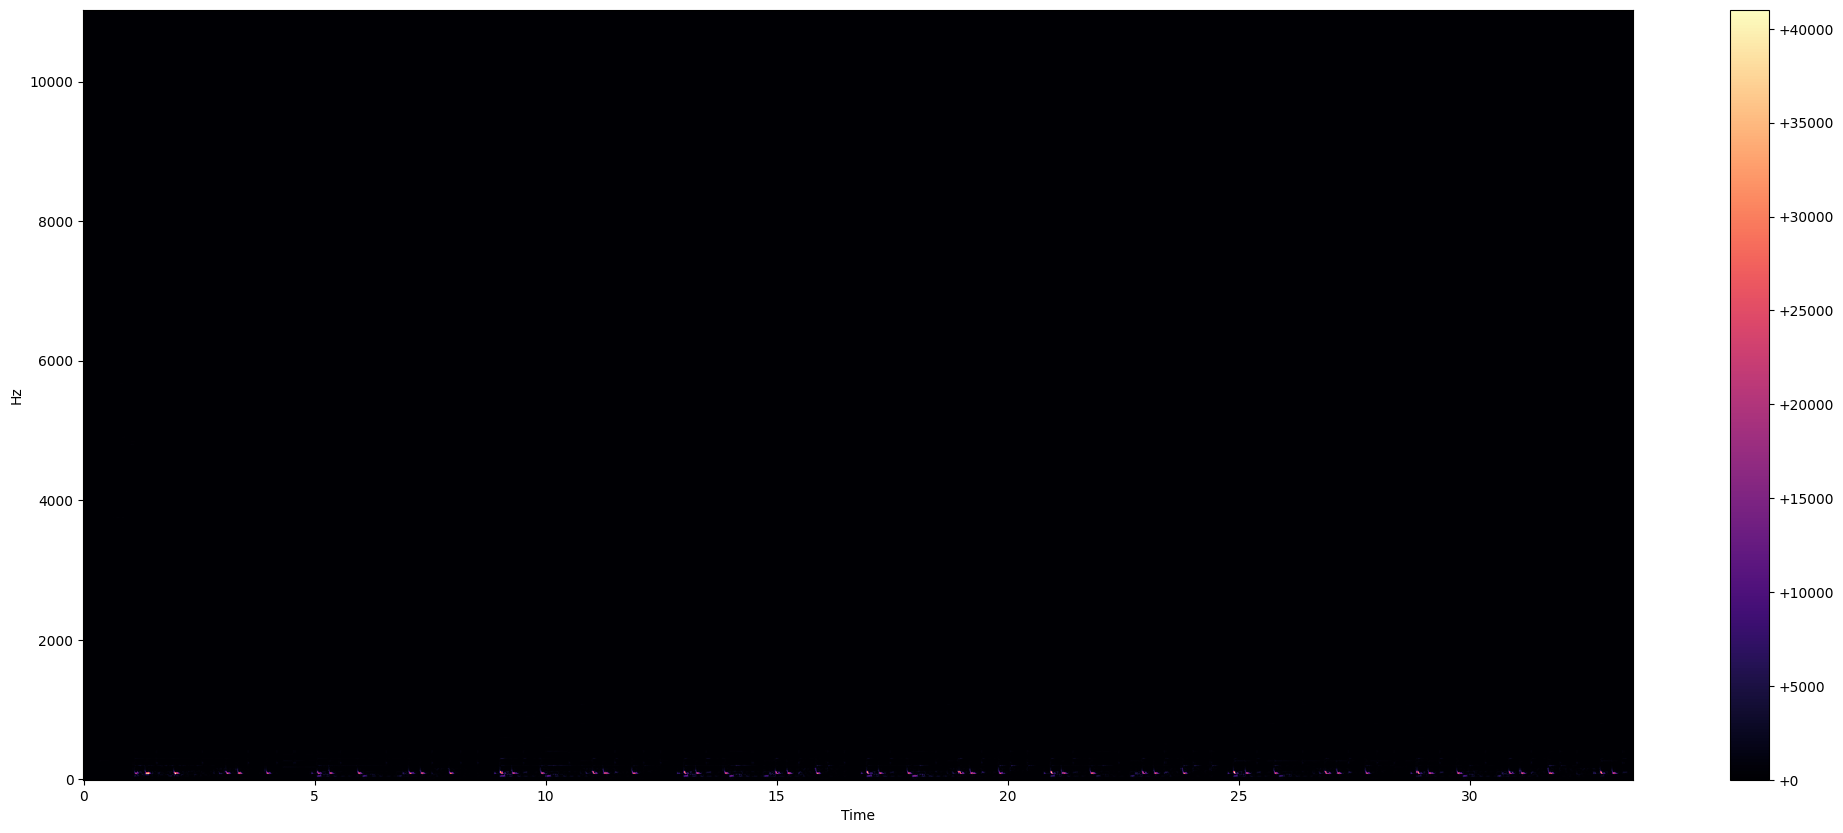

In [68]:
plot_spectogram(ssft_abs,sr,HOP_SIZE) #its all black because the frequnecy range is low

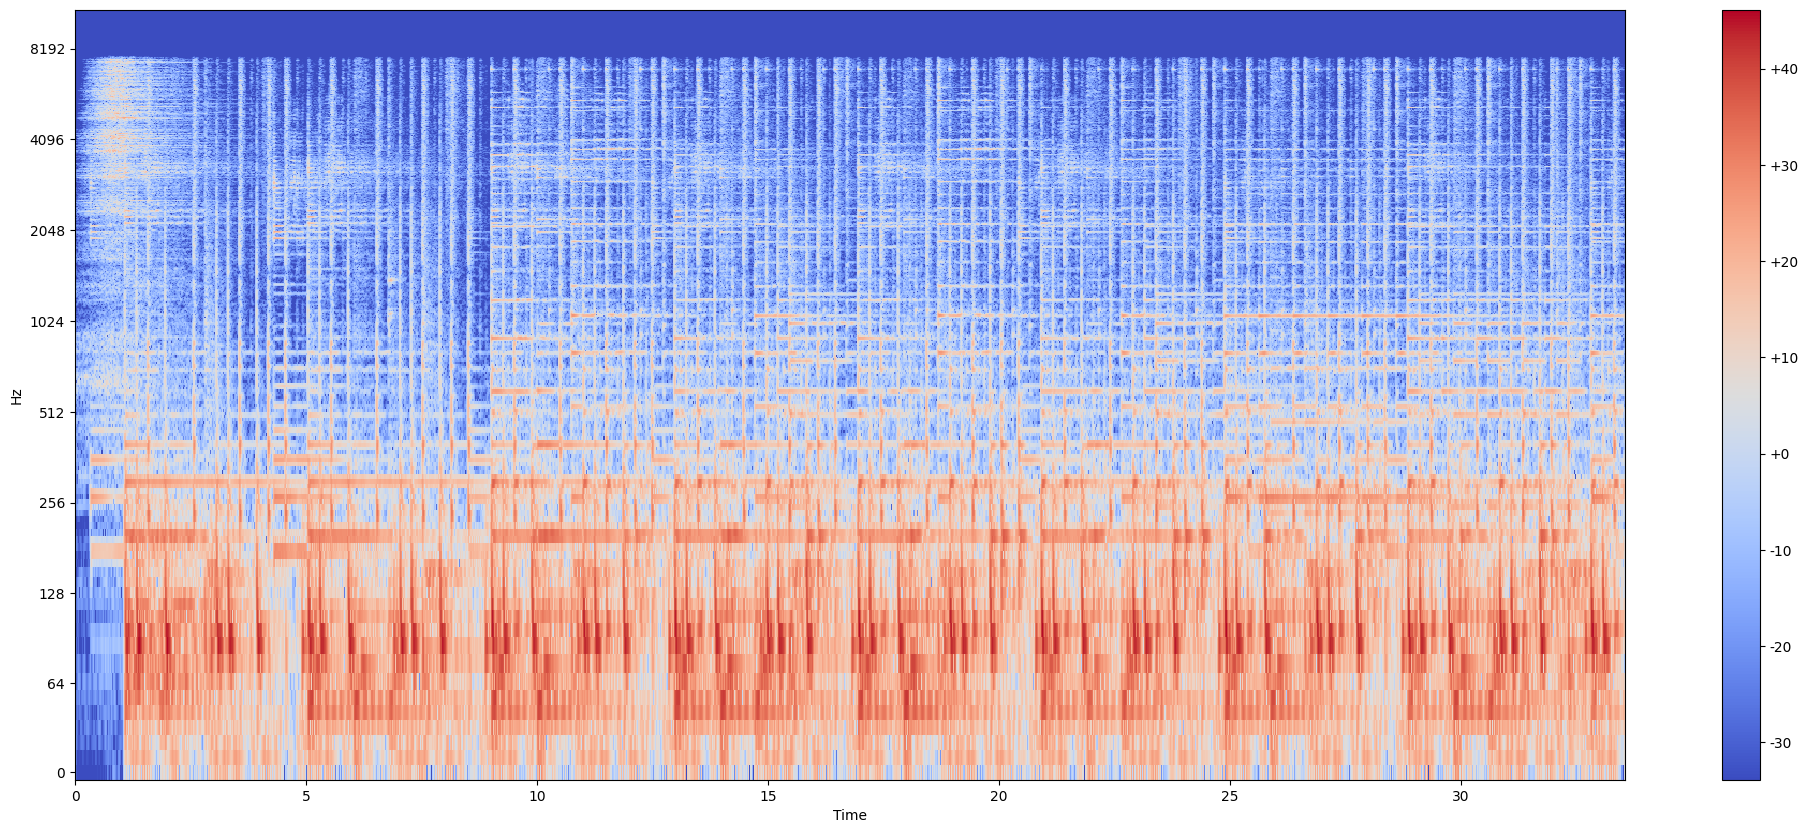

In [72]:
## transform the range 
#convering to log 
ssft_abs_log = librosa.power_to_db(ssft_abs)
plot_spectogram(ssft_abs_log,sr,HOP_SIZE,y_axis = 'log')

In [73]:
##calculating mel frequency ceptral coefficient 
##mel frequnecy is representation of short term power 
#extracting MCCs
mfccs = librosa.feature.mfcc(y=music,n_mfcc=13,sr=sr)

In [75]:
#extracting the 1st and 2nd order MFCCs
delta1_mfccs = librosa.feature.delta(mfccs)
delta2_mfccs = librosa.feature.delta(mfccs,order=2)

In [76]:
##visualizing the MFCCS

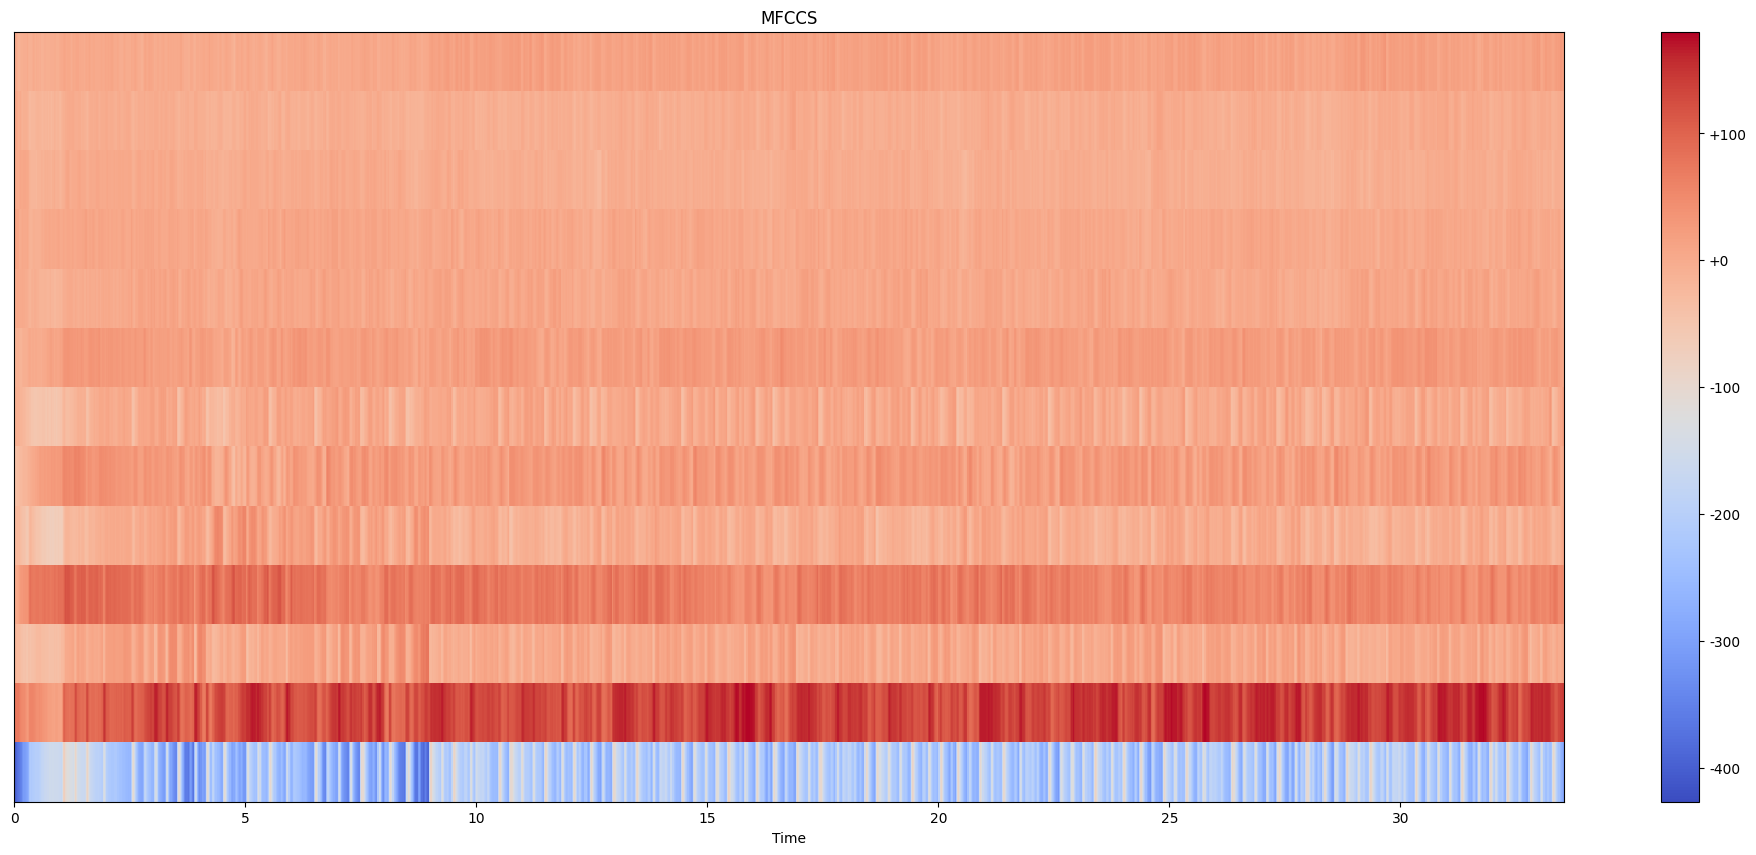

In [77]:
plt.figure(figsize=(25,10))
librosa.display.specshow(mfccs,x_axis="time",sr=sr)
plt.colorbar(format="%+2.f")
plt.title("MFCCS")
plt.show()

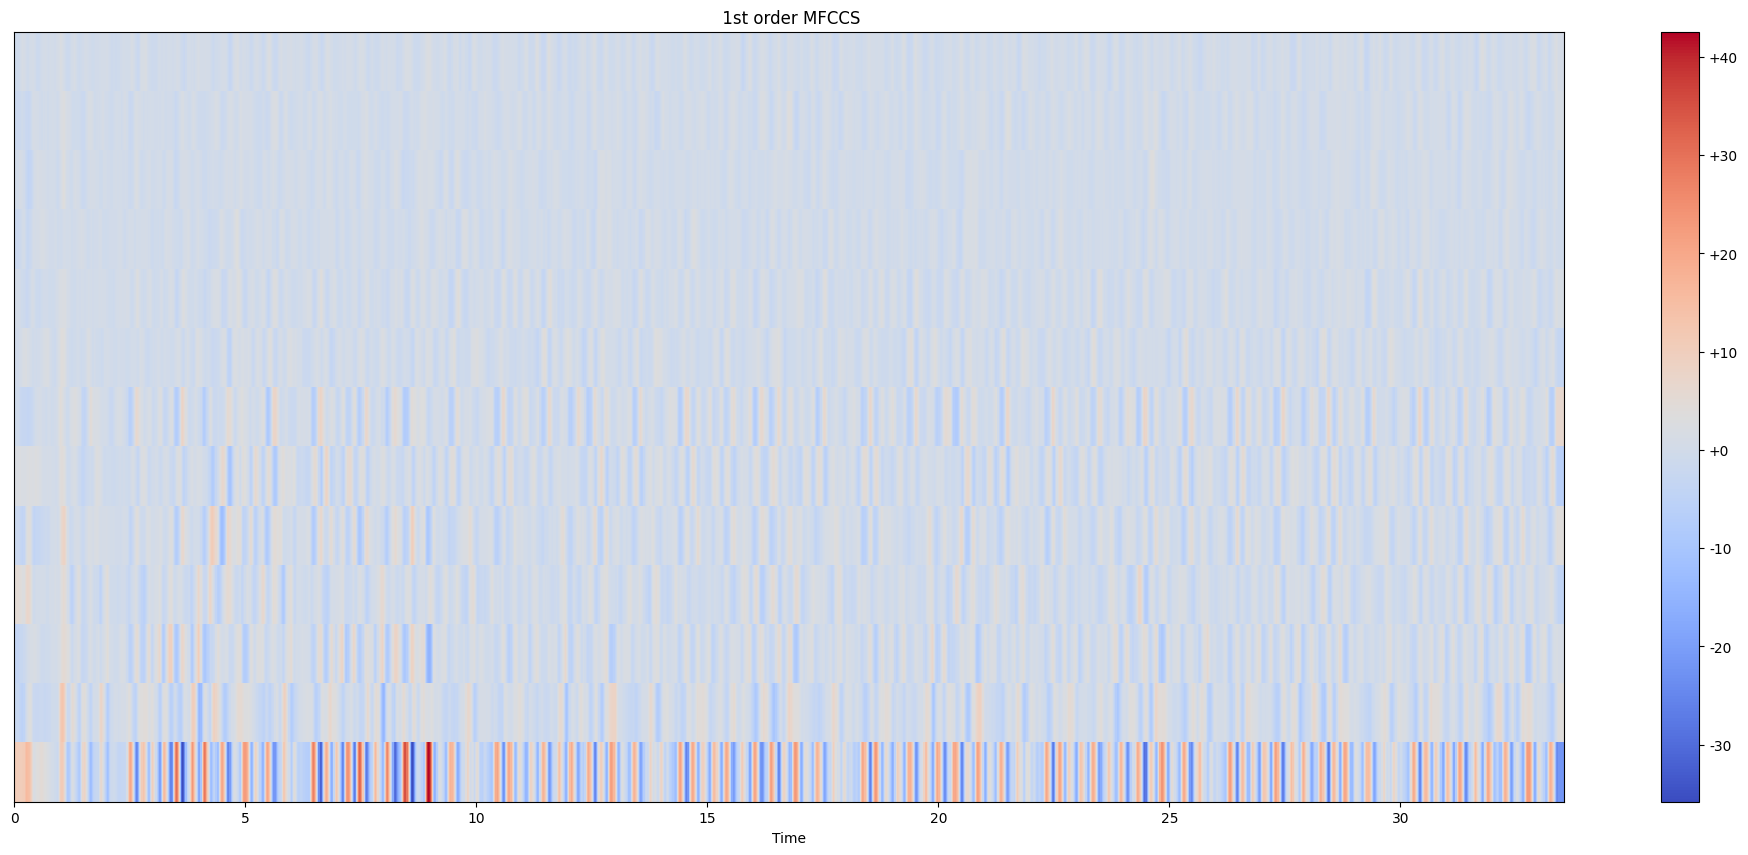

In [79]:
plt.figure(figsize=(25,10))
librosa.display.specshow(delta1_mfccs,x_axis="time",sr=sr)
plt.colorbar(format="%+2.f")
plt.title(" 1st order MFCCS")
plt.show()

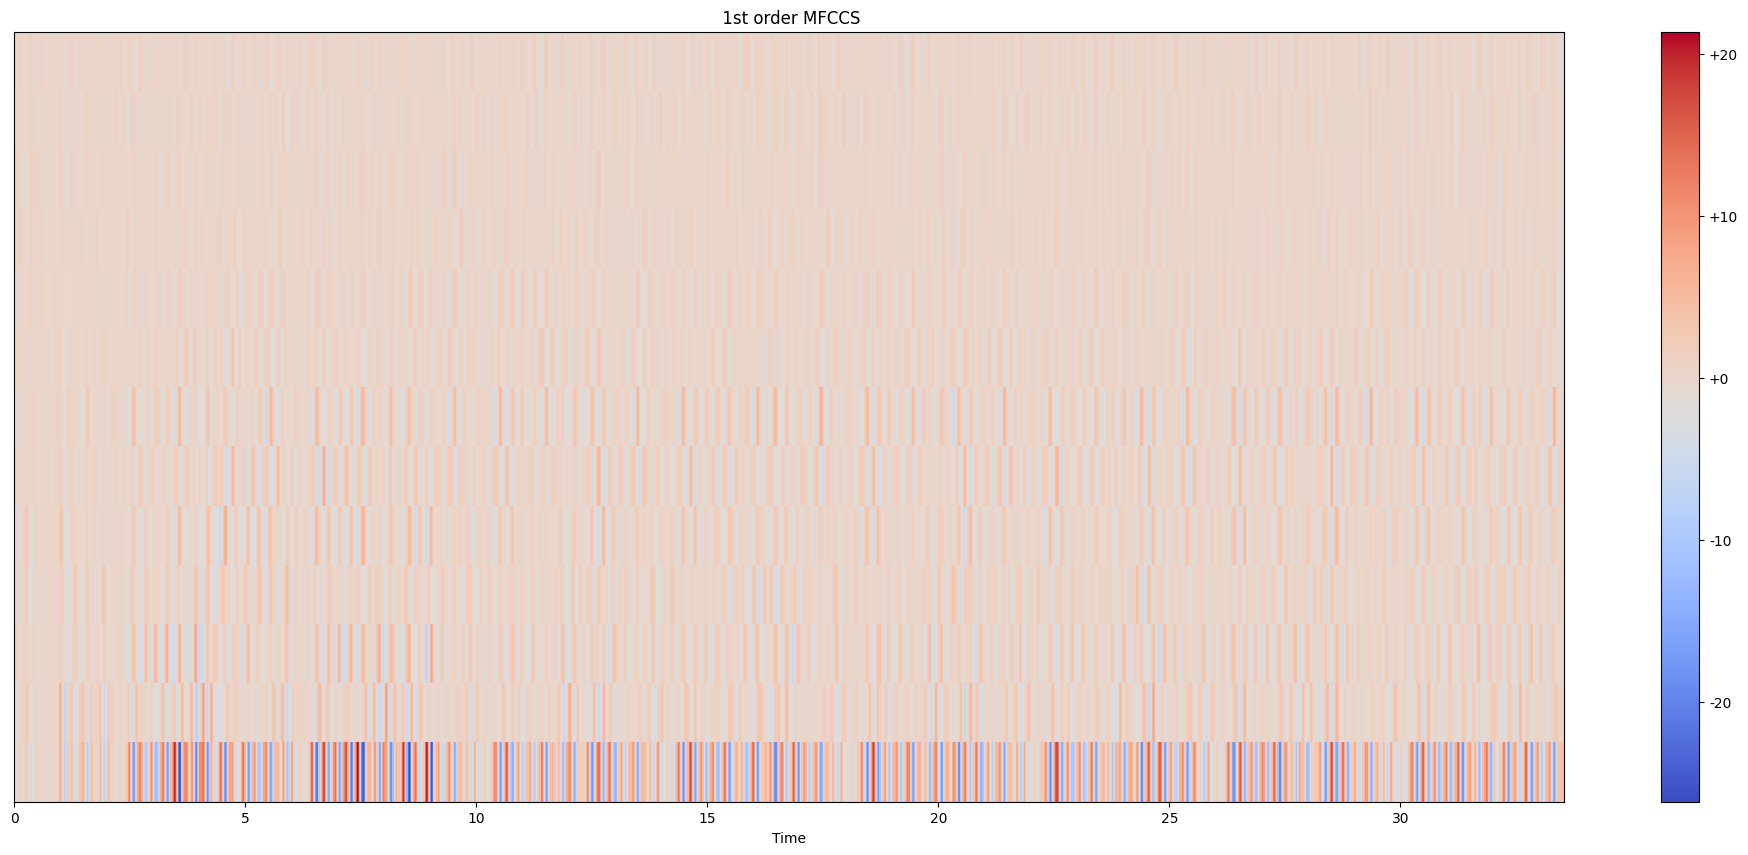

In [80]:
plt.figure(figsize=(25,10))
librosa.display.specshow(delta2_mfccs,x_axis="time",sr=sr)
plt.colorbar(format="%+2.f")
plt.title(" 1st order MFCCS")
plt.show()

In [ ]:
## band energy ratio
#spectral centroid 
